In [1]:
#importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline

In [2]:
df_companies_br = pd.read_csv("download_script/companies_br.csv", encoding="utf8")
#ja que todas as empresas desse dataset sao do brasil, colunas 'region', 'country' e 'exchange' sao irrelevantes
df_companies_br.drop(['region','country','exchange'],axis=1,inplace=True)
df_companies_br.head()

,company_id,industry,company_name,ticker,trading_status
0,683719,Aerospace and Defense,Embraer S.A.,EMBR3,Active
1,879948,Aerospace and Defense,Taurus Armas S.A.,TASA4,Active
2,434971465,Air Freight and Logistics,Sequoia Logística e Transportes S.A.,SEQL3,Active
3,240867411,Airlines,Azul S.A.,AZUL4,Active
4,10127886,Airlines,Gol Linhas Aéreas Inteligentes S.A.,GOLL4,Active


In [3]:
df_companies_rated = pd.read_csv("download_script/companies_rated.csv", encoding="utf8")
df_companies_rated.head()

,company_id,region,country,exchange,industry,company_name,ticker,trading_status
0,4455588,Africa / Middle East,Bahrain,BAX,Banks,Bank of Bahrain and Kuwait B.S.C.,BBK,Active
1,883038,Africa / Middle East,Egypt,CASE,Banks,Commercial International Bank (Egypt) S.A.E,COMI,Active
2,2472872,Africa / Middle East,Egypt,CASE,Capital Markets,EFG-Hermes Holding S.A.E,HRHO,Active
3,46263794,Africa / Middle East,Egypt,CASE,Capital Markets,Pioneers Holding Company For Financial Investm...,PIOH,Active
4,32339123,Africa / Middle East,Egypt,CASE,Capital Markets,Qalaa Holdings S.A.E.,CCAP,Active


In [86]:
def retiralinha(df):
    """
    Funcao para retirar registros de empresas que nao sao do brasil
    """
    for index, row in df.iterrows():
        if row['country']!= 'Brazil':
            df.drop(index, axis=0, inplace = True)
    return df

def retiralinha_id(df,dfcompara):
    print(dfcompara['company_id'].unique())
    for index, row in df.iterrows():
        if row['company_id'] not in dfcompara['company_id'].unique():
            df.drop(index, axis=0, inplace = True)
    return df

In [5]:
#selecionando empresas do brasil que possuem score atribuido pela S&P
df_companies_rated = retiralinha(df_companies_rated)
df_companies_rated.drop(['region','country','exchange'],axis=1,inplace=True)
df_companies_rated.head()

,company_id,industry,company_name,ticker,trading_status
5098,240867411,Airlines,Azul S.A.,AZUL4,Active
5099,878137,Auto Components,MAHLE Metal Leve S.A.,LEVE3,Active
5100,877821,Auto Components,Tupy S.A.,TUPY3,Active
5101,877263,Banks,Banco Bradesco S.A.,BBDC4,Active
5102,26936075,Banks,Banco Pan S.A.,BPAN4,Active


In [6]:
df_companies_financials = pd.read_csv("download_script/companies_financials_br.csv", encoding="utf8")
df_companies_financials.drop(['period_type'], axis=1, inplace= True)
df_companies_financials.head()

,company_id,ref_date,filing_date,data_item_id,data_item,data_item_value,currency,unit,unit_value
0,5646995,2013-02-28,2014-05-25,1,Cost Of Revenues,2107.836,BRL,Millions,1000000
1,5646995,2013-02-28,2014-05-25,4,"EBT, Excl. Unusual Items",183.674,BRL,Millions,1000000
2,5646995,2013-02-28,2014-05-25,7,Earnings From Continuing Operations,136.587,BRL,Millions,1000000
3,5646995,2013-02-28,2014-05-25,10,Gross Profit,668.381,BRL,Millions,1000000
4,5646995,2013-02-28,2014-05-25,15,Net Income - (IS),136.587,BRL,Millions,1000000


In [10]:
#serie temporal de 'data_item_value', para cada empresa, para cada metrica
df_teste2 = df_companies_financials.groupby(['data_item_id','company_id','ref_date']).sum()

In [11]:
df_teste2.drop('unit_value',axis=1,inplace=True)
df_teste2.head()

data_item_value
data_item_id company_id ref_date                   
1            26105      2013-12-31          293.816
                        2014-12-31          315.439
                        2015-12-31          360.146
                        2016-12-31          344.464
                        2017-12-31          351.169

In [7]:
dfaux = df_companies_financials[(df_companies_financials['data_item_id'] == 1) & (df_companies_financials['company_id']==26105)]
dfaux.drop(['filing_date','data_item','currency','unit','unit_value'],axis=1,inplace=True)
dfaux.head()

c:\users\andre\desktop\ufrj\analytica\navi_tech_journey\venv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,company_id,ref_date,data_item_id,data_item_value
1118,26105,2013-12-31,1,293.816
38757,26105,2014-12-31,1,315.439
77123,26105,2015-12-31,1,360.146
116030,26105,2016-12-31,1,344.464
155779,26105,2017-12-31,1,351.169


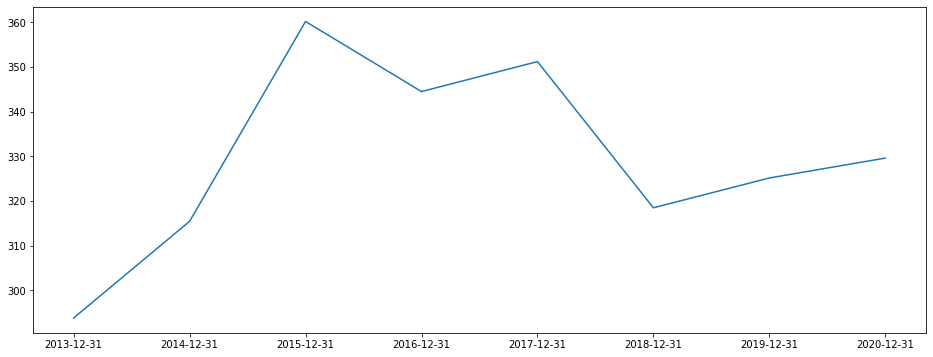

In [8]:
plt.figure(figsize=(16,6))
plt.plot(dfaux['ref_date'],dfaux['data_item_value'])

In [118]:
#grafico interativo, prototipo do que ira ficar no app

@widgets.interact(id_company = df_companies_financials['company_id'].unique(), 
                  id_data_item = df_companies_financials['data_item'].unique())
def plotar(id_company, id_data_item):
    
    df_ = df_companies_financials[(df_companies_financials['data_item'] == id_data_item) & (df_companies_financials['company_id']==id_company)]
    df_.drop(['filing_date','data_item','currency','unit','unit_value'],axis=1,inplace=True)
    plt.figure(figsize=(16,6))
    plt.plot(df_['ref_date'],df_['data_item_value'])


interactive(children=(Dropdown(description='id_company', options=(5646995, 5467148, 5522655, 22816862, 4705830…

In [42]:
env_data = pd.read_csv("download_script/environmental_data_history_br.csv", encoding="utf8")
env_data.head()

,data_group,fiscal_year,sector_name,company_id,data_item_name,data_item_value,unit
0,Trucost Environmental Data,2002,"Animal (except poultry) slaughtering, renderin...",683718,Absolute: Air Pollutants Direct & Indirect Cost,4.192180e+01,$M
1,Trucost Environmental Data,2002,"Animal (except poultry) slaughtering, renderin...",683718,Absolute: Air Pollutants Direct Cost,6.437762e-01,$M
2,Trucost Environmental Data,2002,"Animal (except poultry) slaughtering, renderin...",683718,Absolute: Air Pollutants Indirect Cost,4.127803e+01,$M
3,Trucost Environmental Data,2002,"Animal (except poultry) slaughtering, renderin...",683718,"Absolute: Cooling, Process, and Purchased",3.001557e+08,m³
4,Trucost Environmental Data,2002,"Animal (except poultry) slaughtering, renderin...",683718,Absolute: Direct & Indirect Cost,3.220848e+02,$M


In [16]:
esg_scores_br = pd.read_csv("download_script/esg_scores_history_br.csv", encoding="utf8")
esg_scores_br.head()

,assessment_year,industry,company_id,parent_aspect,aspect,score_weight,score_value
0,2013,BNK Banks,873831,Environmental Dimension,Business Risks and Opportunities,9,97.500000
1,2013,BNK Banks,873831,Environmental Dimension,Climate Strategy,4,69.950000
2,2013,BNK Banks,873831,Environmental Dimension,Environmental Policy & Management Systems,4,80.640000
3,2013,BNK Banks,873831,Environmental Dimension,Environmental Reporting,3,86.000000
4,2013,BNK Banks,873831,Environmental Dimension,Operational Eco-Efficiency,4,41.929846


In [56]:
esg_scores_rated = pd.read_csv("download_script/esg_scores_history_rated.csv", encoding="utf8")
esg_scores_rated.head()

,assessment_year,industry,company_id,parent_aspect,aspect,score_weight,score_value
0,2013,AIR Airlines,31726,Environmental Dimension,Environmental Policy & Management Systems,8,43.40
1,2013,AIR Airlines,31726,Environmental Dimension,Environmental Reporting,7,40.25
2,2013,AIR Airlines,31726,Environmental Dimension,Operational Eco-Efficiency,11,32.40
3,2013,AIR Airlines,31726,Governance & Economic Dimension,Antitrust Policy,3,55.75
4,2013,AIR Airlines,31726,Governance & Economic Dimension,Brand Management,4,23.00


In [34]:
df_company_financial = pd.merge(df_companies_rated, 
                                df_companies_financials, 
                                on = 'company_id', 
                                how = 'outer')

In [35]:
df_company_financial['new_ref_date'] = pd.to_datetime(df_company_financial['ref_date'])
df_company_financial['assessment_year'] = df_company_financial['new_ref_date'].dt.year

In [36]:
df_esg_history = esg_scores_br[esg_scores_br['aspect'] == 'S&P Global ESG Score']

In [48]:
df_company_esg = pd.merge(df_esg_history, df_company_financial, on = ['company_id', 'assessment_year'], how = 'left')
df_company_esg.fillna(0,inplace=True)
df_company_esg['data_item_id'] = df_company_esg['data_item_id'].astype(int)
df_company_esg.head()

,assessment_year,industry_x,company_id,parent_aspect,aspect,score_weight,score_value,industry_y,company_name,ticker,trading_status,ref_date,filing_date,data_item_id,data_item,data_item_value,currency,unit,unit_value,new_ref_date
0,2013,BNK Banks,873831,0,S&P Global ESG Score,100,82.906961,Banks,Itaú Unibanco Holding S.A.,ITUB4,Active,2013-12-31,2016-04-29,4,"EBT, Excl. Unusual Items",26131.0,BRL,Millions,1000000.0,2013-12-31 00:00:00
1,2013,BNK Banks,873831,0,S&P Global ESG Score,100,82.906961,Banks,Itaú Unibanco Holding S.A.,ITUB4,Active,2013-12-31,2016-04-29,7,Earnings From Continuing Operations,16522.0,BRL,Millions,1000000.0,2013-12-31 00:00:00
2,2013,BNK Banks,873831,0,S&P Global ESG Score,100,82.906961,Banks,Itaú Unibanco Holding S.A.,ITUB4,Active,2013-12-31,2016-04-29,10,Gross Profit,64517.0,BRL,Millions,1000000.0,2013-12-31 00:00:00
3,2013,BNK Banks,873831,0,S&P Global ESG Score,100,82.906961,Banks,Itaú Unibanco Holding S.A.,ITUB4,Active,2013-12-31,2016-04-29,15,Net Income - (IS),16424.0,BRL,Millions,1000000.0,2013-12-31 00:00:00
4,2013,BNK Banks,873831,0,S&P Global ESG Score,100,82.906961,Banks,Itaú Unibanco Holding S.A.,ITUB4,Active,2013-12-31,2016-04-29,16,Net Income to Common Incl Extra Items,16424.0,BRL,Millions,1000000.0,2013-12-31 00:00:00


In [117]:
#grafico interativo, prototipo do que ira ficar no app

@widgets.interact(id_company = df_company_esg['company_id'].unique(), 
                  id_data_item = df_company_esg['data_item'].unique())
def plotar(id_company, id_data_item):
    
    df_ = df_company_esg[(df_company_esg['data_item'] == id_data_item) & (df_company_esg['company_id']==id_company)]
    df_.drop(['filing_date','data_item','currency','unit','unit_value'],axis=1,inplace=True)
    fig, axes = plt.subplots(2,1,figsize=(16,8))
    axes[0].plot(df_['ref_date'],df_['data_item_value'])
    axes[0].set_title(id_data_item)
    axes[1].plot(df_['ref_date'],df_['score_value'])
    axes[1].set_title("Score")

interactive(children=(Dropdown(description='id_company', options=(873831, 874155, 875352, 877263, 134386019, 3…

In [121]:
#grafico interativo, prototipo do que ira ficar no app
#grafico de correlacao entre data_item e score (o quanto o data_item influencia no score)

@widgets.interact(id_company = df_company_esg['company_id'].unique(), 
                  id_data_item = df_company_esg['data_item'].unique())
def plotar(id_company, id_data_item):
    
    df_ = df_company_esg[(df_company_esg['data_item'] == id_data_item) & (df_company_esg['company_id']==id_company)]
    df_.drop(['filing_date','data_item','currency','unit','unit_value'],axis=1,inplace=True)
    print(df_[['data_item_value','score_value']].corr().iloc[1,0])

interactive(children=(Dropdown(description='id_company', options=(873831, 874155, 875352, 877263, 134386019, 3…

### Visualizando (RASCUNHO)

In [107]:
## fazer graficos interativos: seleciona um id, e seleciona um parametro para visualizar - OK
## grafico de pizza? - NAO FICA DAORA COM MUITOS ITENS
#analisar como as empresas se comportaram apos o acordo de paris (2015) (environmental_data x paris_alignment)

In [89]:
env_data = pd.read_csv('download_script/environmental_data_history_br.csv', encoding="utf8")

In [29]:
df_teste = env_data[env_data['company_id']==276601]
df_teste.head()

,data_group,fiscal_year,sector_name,company_id,data_item_name,data_item_value,unit
0,Trucost Environmental Data,2002,"Accounting, tax preparation, bookkeeping, and ...",276601,Absolute: Air Pollutants Direct & Indirect Cost,2.555765e+00,$M
1,Trucost Environmental Data,2002,"Accounting, tax preparation, bookkeeping, and ...",276601,Absolute: Air Pollutants Direct Cost,1.181238e-01,$M
2,Trucost Environmental Data,2002,"Accounting, tax preparation, bookkeeping, and ...",276601,Absolute: Air Pollutants Indirect Cost,2.437642e+00,$M
3,Trucost Environmental Data,2002,"Accounting, tax preparation, bookkeeping, and ...",276601,"Absolute: Cooling, Process, and Purchased",2.106210e+07,m³
4,Trucost Environmental Data,2002,"Accounting, tax preparation, bookkeeping, and ...",276601,Absolute: Direct & Indirect Cost,1.547207e+01,$M


In [92]:
#grafico interativo, prototipo do que ira ficar no app

@widgets.interact(id_company = env_data['company_id'].unique(), 
                  id_data_item = env_data['data_item_name'].unique())
def plotar(id_company, id_data_item):
    
    df_ = env_data[(env_data['data_item_name'] == id_data_item) & (env_data['company_id']==id_company)]
    plt.figure(figsize=(16,6))
    plt.plot(df_['fiscal_year'],df_['data_item_value'])


interactive(children=(Dropdown(description='id_company', options=(683718, 393311, 411574, 874155, 767610, 5507…

In [123]:
paris_alignment_br = pd.read_csv('download_script/paris_alignment_br.csv', encoding='utf-8')
paris_alignment_br.head()

,data_group,fiscal_year,company_id,base_year,emission_year,data_item_name,data_item_value,unit,alignment_type
0,Trucost Paris Alignment Data,2017,144081,2012,2012,Alignment Gap 2°C,644530.0000,tCO2e,>5°C
1,Trucost Paris Alignment Data,2017,144081,2012,2012,Alignment Gap 3°C,636988.5440,tCO2e,>5°C
2,Trucost Paris Alignment Data,2017,144081,2012,2012,Alignment Gap 4°C,634746.2290,tCO2e,>5°C
3,Trucost Paris Alignment Data,2017,144081,2012,2012,Alignment Gap 5°C,633492.8020,tCO2e,>5°C
4,Trucost Paris Alignment Data,2017,144081,2012,2012,Alignment Gap Well Below 2°C,657861.7205,tCO2e,>5°C


In [153]:
#grafico interativo, prototipo do que ira ficar no app

@widgets.interact(id_company = paris_alignment_br['company_id'].unique())
def plotar(id_company):
    
    df_ = paris_alignment_br[paris_alignment_br['company_id']==id_company]
    plt.figure(figsize=(16,6))
    sns.lineplot(x=df_['fiscal_year'],y=df_['data_item_value'],hue=df_['data_item_name'])

interactive(children=(Dropdown(description='id_company', options=(144081, 392996, 394524, 402548, 403623, 4092…

In [193]:
#grafico interativo, prototipo do que ira ficar no app
#ver como empresas estao se comportando apos o acordo de paris

#algumas metricas sao irrelevantes de serem comparadas

#metricas relacionadas a CHG podem ser relevantes (Carbon: Greenhouse gas (GHG) emissions )

# interessante: The dataset allows users to identify the scale of reductions required 
# by 2025 and beyond to meet the Paris Agreement goal.

@widgets.interact(id_company = paris_alignment_br['company_id'].unique(), 
                  id_data_item = env_data['data_item_name'].unique(),)
def plotar(id_company, id_data_item):
    
    try:
        df1 = env_data[(env_data['data_item_name'] == id_data_item) & (env_data['company_id']==id_company)]
        df2 = paris_alignment_br[paris_alignment_br['company_id']==id_company]
        fig, axes = plt.subplots(2, 1, figsize=(16,8))
        axes[0].plot(df1['fiscal_year'],df1['data_item_value'])
        axes[0].set_xlabel('Year')
        #axes[0].set_xlim([2017,2019])
        axes[0].set_ylabel(f"Value, in {df1['unit'].iloc[0]}")
        sns.lineplot(x=df2['fiscal_year'],y=df2['data_item_value'],hue=df2['data_item_name'],ax=axes[1])
        axes[1].set_ylabel(f"value, in {df2['unit'].iloc[0]}")
    except:
        print('Nao foi possivel fazer grafico com esses parametros')

interactive(children=(Dropdown(description='id_company', options=(144081, 392996, 394524, 402548, 403623, 4092…

In [189]:
paris_alignment_br['fiscal_year'].unique()

array([2017, 2018, 2019], dtype=int64)

In [148]:
len(env_data['company_id'].unique()) - len(paris_alignment_br['company_id'].unique())
#19 empresas a mais'

19